
## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [2]:
from  math import  factorial
from  math import  exp
import matplotlib.pylab as plt
import numpy as np

def exponencial1(n, x): 
    #Se define la función exponencial
    _exp = 0
    for i in range(0, n):
      num  = ((-1) ** i ) * x ** i #Se expresa la sumatoria de la función exponencial.
      den  = factorial(i)
      _exp = _exp + num / den 
    return _exp


def exponencial2(n, x): 
    #Diferente forma de expresar la función exponencial
    _exp = 0
    for i in range(0, n):
      num  =  x ** i
      den  = factorial(i)
      _exp = _exp + num / den 

    return 1/_exp

-1.6653345369377348e-16

In [4]:
N = np.arange(2, 50)
x = 30

exp_1 = np.zeros(len(N))
exp_2 = np.zeros(len(N))

for i, n in enumerate(N):

  exp_1[i] = exponencial1(n = n, x = x)
  exp_2[i] = exponencial2(n = n, x = x)

In [11]:
exp_1

array([-2.90000000e+01,  4.21000000e+02, -4.07900000e+03,  2.96710000e+04,
       -1.72829000e+05,  8.39671000e+05, -3.49961471e+06,  1.27727067e+07,
       -4.14683647e+07,  1.21254850e+08, -3.22535735e+08,  7.86940726e+08,
       -1.77338957e+09,  3.71303249e+09, -7.25981163e+09,  1.33142711e+10,
       -2.29929337e+10,  3.75190743e+10, -5.80262015e+10,  8.52917122e+10,
       -1.19448165e+11,  1.59742576e+11, -2.04419260e+11,  2.50783036e+11,
       -2.95459719e+11,  3.34820382e+11, -3.65490841e+11,  3.84842613e+11,
       -3.91364408e+11,  3.84842613e+11, -3.66325472e+11,  3.37894607e+11,
       -3.02305465e+11,  2.62576952e+11, -2.21607977e+11,  1.81879464e+11,
       -1.45272515e+11,  1.13005363e+11, -8.56699279e+10,  6.33365401e+10,
       -4.56925829e+10,  3.21853621e+10, -2.21480879e+10,  1.48974462e+10,
       -9.79957650e+09,  6.30717745e+09, -3.97372933e+09,  2.45183741e+09])

In [2]:
np.shape(exp_1)

NameError: name 'np' is not defined

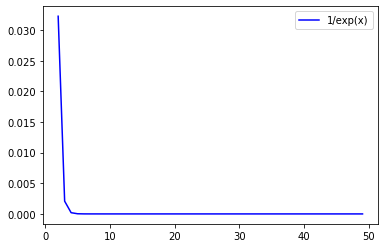

In [5]:
plt.figure()
#plt.plot(N, exp_1,"r-", label="Serie alternante exp(x)"   )
plt.plot(N, exp_2,"b-",label="1/exp(x)"   )
plt.legend()
plt.show()

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [38]:
"""
Se definen las tres series alternantes; Sn1, Sn2 y Sn3, 

realizando los calculos para cada una.
"""
  

def Sn1(n, x): 
    #Escriba aca su codigo 
    s = 0
    for i in range(1, n*2):
      num  = ((-1) ** i )*i
      den  = i+1
      s = s + num / den 
    return s

def Sn2(n, x): 
    s = 0
    for i in range(1, n):
      num  = -((2*i)-1)/(2*i)
      den  = (2*i)/((2*i)+1)
      s = s + (num + den) 
    return s

def Sn3(n, x): 
    s = 0
    for i in range(1, n):
      den  = (2*i)*((2*i)+1)
      s = s + den 
    return 1/s

In [62]:
Sn3(3, 1)

0.038461538461538464

In [64]:
print(Sn1(10,1))
print(Sn2(10,1))
print(Sn3(10,1))

-0.668771403175428
0.2812285968245719
0.0008130081300813008


In [58]:
N = np.arange(10,10*7)
x = 30

s1 = np.zeros(len(N))
s2 = np.zeros(len(N))
s3 = np.zeros(len(N))

for i, n in enumerate(N):

  s1[i] = Sn1(n = n, x = x) #Cálculo de las tres series
  s2[i] = Sn2(n = n, x = x)
  s3[i] = Sn3(n = n, x = x)

In [74]:
N

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

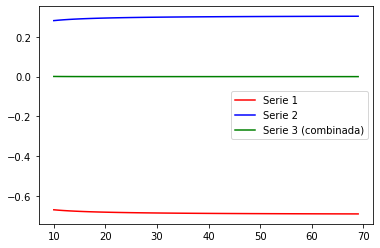

In [59]:
#Graficaión de las tres series .
#Análisis de convergencia.
plt.figure()
plt.plot(N, s1,"r-", label="Serie 1"   )
plt.plot(N, s2,"b-",label="Serie 2"   )
plt.plot(N, s3,"g-", label="Serie 3 (combinada)"   ) #Suma de las series alternante.
plt.legend()
plt.show()
#la serie combinada converge a 0.

In [62]:

E1=np.log10(abs((s1-s3)/s3)) #Error relativo para serie 1
lN=np.log10(N)

In [56]:
lN

array([1.        , 1.04139269, 1.07918125, ..., 6.99999987, 6.99999991,
       6.99999996])

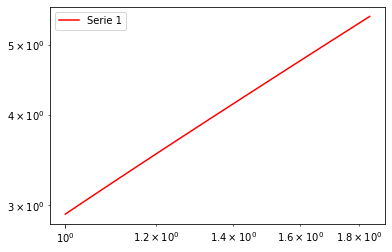

In [63]:
plt.figure()
plt.loglog(lN, E1,"r-", label="Serie 1"   ) #Se grafica en escala logaritmica.
 #Graficación de error relativo en función de número de terminos para serie 1.
plt.legend()
plt.show()

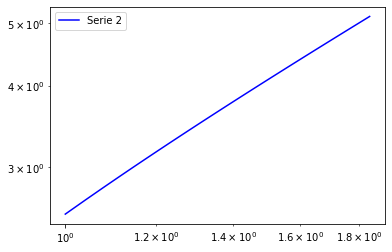

In [64]:
E2=np.log10(abs((s2-s3)/s3)) #Error relativo para serie 2.
lN=np.log10(N)
plt.figure()
plt.loglog(lN, E2,"b-", label="Serie 2"   ) #Se grafica en escala logaritmica.
 # #Graficación de error relativo en función de número de terminos para serie 2.
plt.legend()
plt.show()

## **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```
       

In [15]:
def f(x, r):
 
  x = r * x * (1 - x)
  return x

def mapa_logistico(xi, r, Ntiempos):
  """
  Construye un array con la poblacion para un numero Ntiempos definido.
    xi: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    poblacion_: Array con la Poblacion final
    """
  poblacion_ = np.zeros(Ntiempos)
  for i in range(0, Ntiempos):
    xn = f(xi, r)
    xi = xn
    poblacion_[i] = xn

  return poblacion_ 

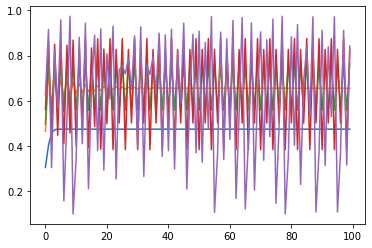

In [46]:
Ntiempos = 100
N = np.arange(0, Ntiempos, 1)
#r = np.linspace(0.1, 3.9, 100)
r=[1.9, 2.9, 3.1, 3.5, 3.9]

plt.figure()
  
for i in range(0, len(r) ):

  p1 = mapa_logistico(0.2, r[i], Ntiempos)
  plt.plot(N, p1, label=""+str(r[i])+"")
  
#plt.legend()
plt.show()

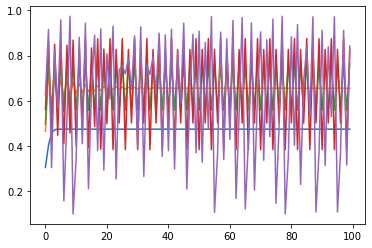

In [47]:
def f(x, r):
 
  x = r*x - r*(x**2)
  return x
def mapa_logistico(xi, r, Ntiempos):
  """
  Construye un array con la poblacion para un numero Ntiempos definido.
    xi: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    poblacion_: Array con la Poblacion final
    """
  poblacion_ = np.zeros(Ntiempos)
  for i in range(0, Ntiempos):
    xn = f(xi, r)
    xi = xn
    poblacion_[i] = xn

  return poblacion_ 

Ntiempos = 100
N = np.arange(0, Ntiempos, 1)
#r = np.linspace(0.1, 3.9, 100)
r=[1.9, 2.9, 3.1, 3.5, 3.9]

plt.figure()
  
for i in range(0, len(r) ):

  p1 = mapa_logistico(0.2, r[i], Ntiempos)
  plt.plot(N, p1, label=""+str(r[i])+"")
  
#plt.legend()
plt.show()

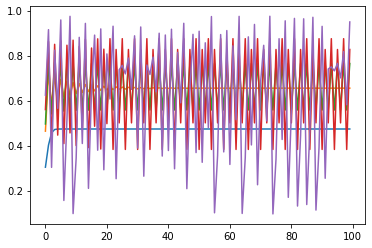

In [50]:
def f(x, r):
 
  x = r*(x**2)*((1/x)-1) 
  return x
def mapa_logistico(xi, r, Ntiempos):
  """
  Construye un array con la poblacion para un numero Ntiempos definido.
    xi: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    poblacion_: Array con la Poblacion final
    """
  poblacion_ = np.zeros(Ntiempos)
  for i in range(0, Ntiempos):
    xn = f(xi, r)
    xi = xn
    poblacion_[i] = xn

  return poblacion_ 

Ntiempos = 100
N = np.arange(0, Ntiempos, 1)
#r = np.linspace(0.1, 3.9, 100)
r=[1.9, 2.9, 3.1, 3.5, 3.9]

plt.figure()
  
for i in range(0, len(r) ):

  p1 = mapa_logistico(0.2, r[i], Ntiempos)
  plt.plot(N, p1, label=""+str(r[i])+"")
  
#plt.legend()
plt.show()